In [3]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from PIL import Image
from keras.preprocessing import image

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Activation, Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization

import pathlib

from google.colab import drive
drive.mount('/content/drive')



root_dir = '/content/drive/MyDrive/IA_ProyectoAgosto/emociones'

train_dir = root_dir + '/train/'
test_dir = root_dir + '/test/'

labels = os.listdir(train_dir)
target_var = labels

#counting the images in each dataset

file_count = len(list(pathlib.Path(root_dir).glob('*/*/*.png')))
print('Total image count:', file_count)

file_count = len(list(pathlib.Path(train_dir).glob('*/*.png')))
print('Total training images:', file_count)

file_count = len(list(pathlib.Path(test_dir).glob('*/*.png')))
print('Total testing images:', file_count)

Mounted at /content/drive
Total image count: 35887
Total training images: 28709
Total testing images: 7178


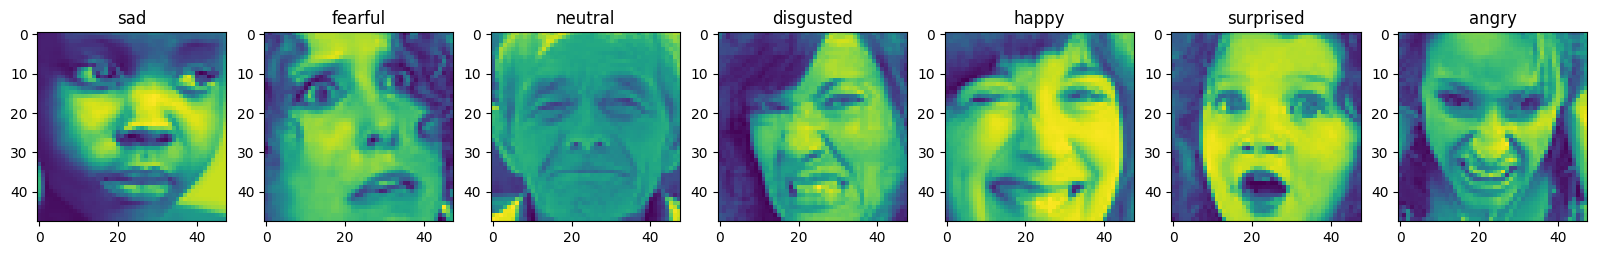

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 7, figsize=(20,8))

for i in range(len(target_var)):
    #d = train_dir+target_var[i]+'/'+os.listdir(train_dir+target_var[i]+'/')[0]
    d = os.path.join(train_dir, target_var[i], os.listdir(os.path.join(train_dir, target_var[i]))[0]) # Use os.path.join for path construction
    axes[i].imshow( plt.imread(d) )
    axes[i].set_title(target_var[i])
plt.savefig('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/emociones', format='pdf')

plt.show()

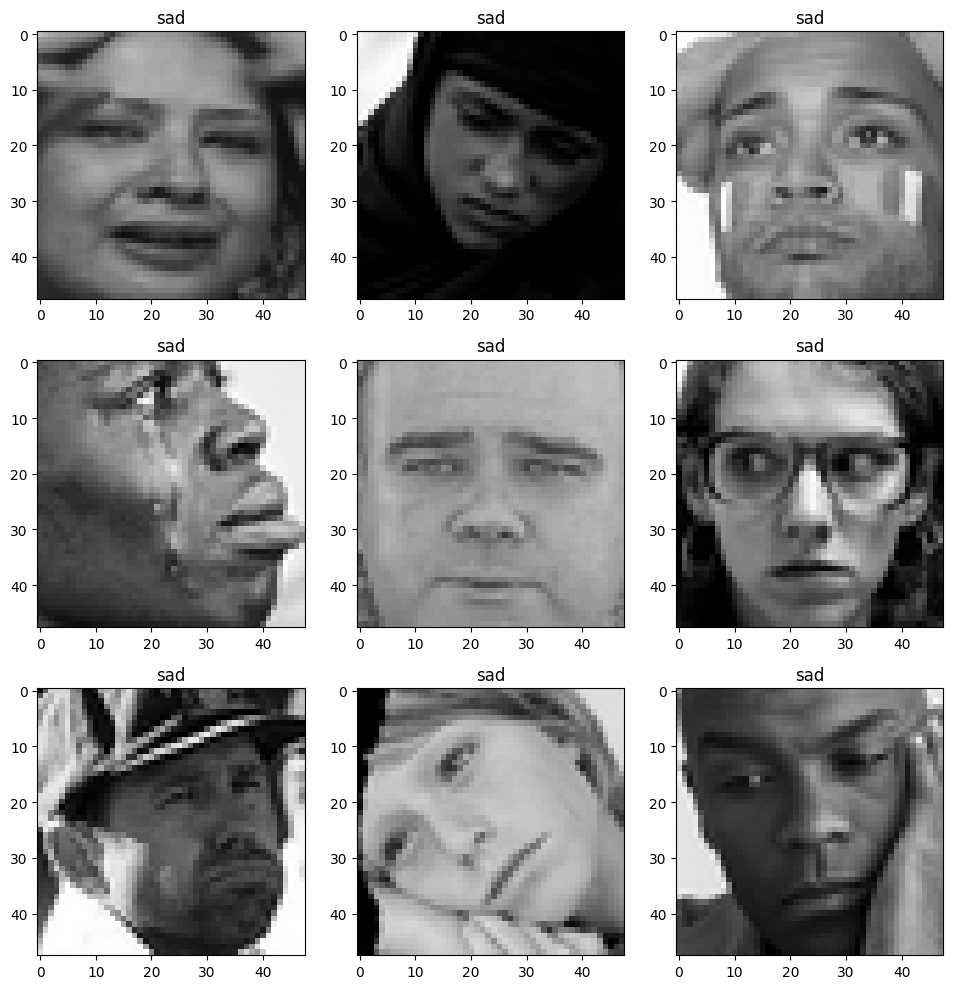

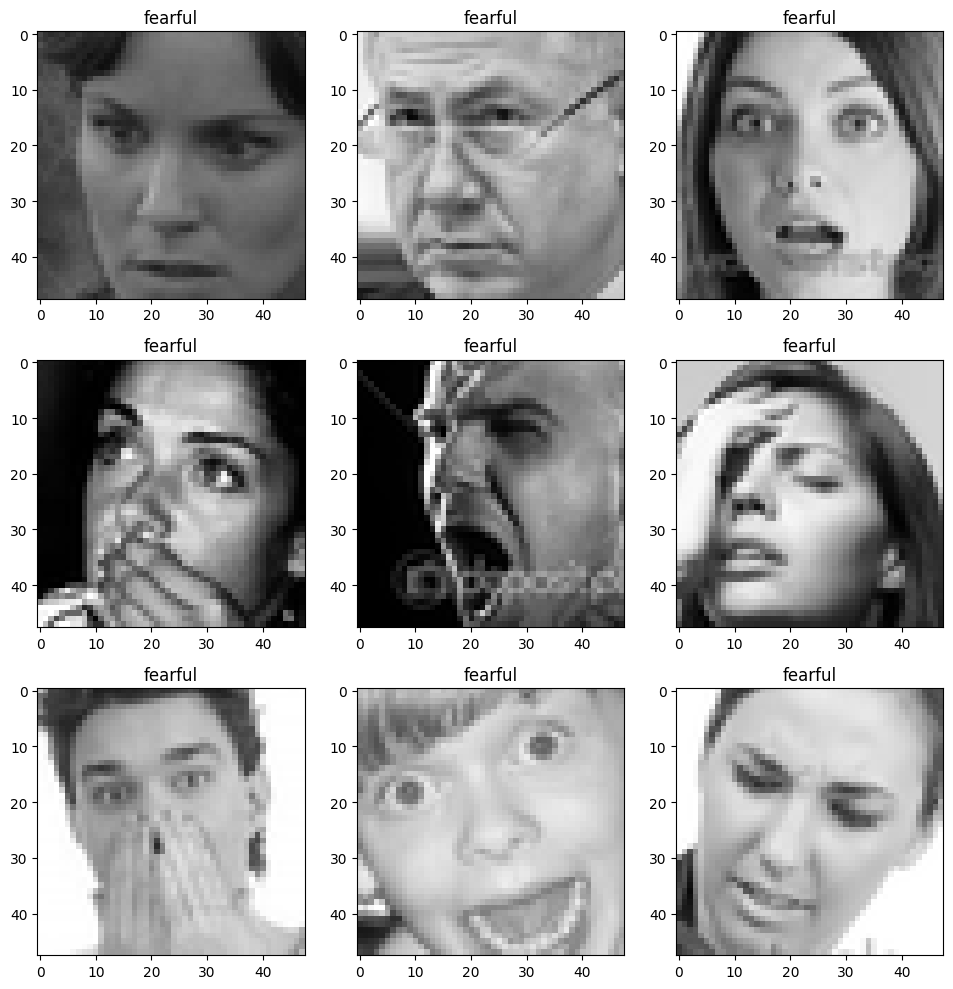

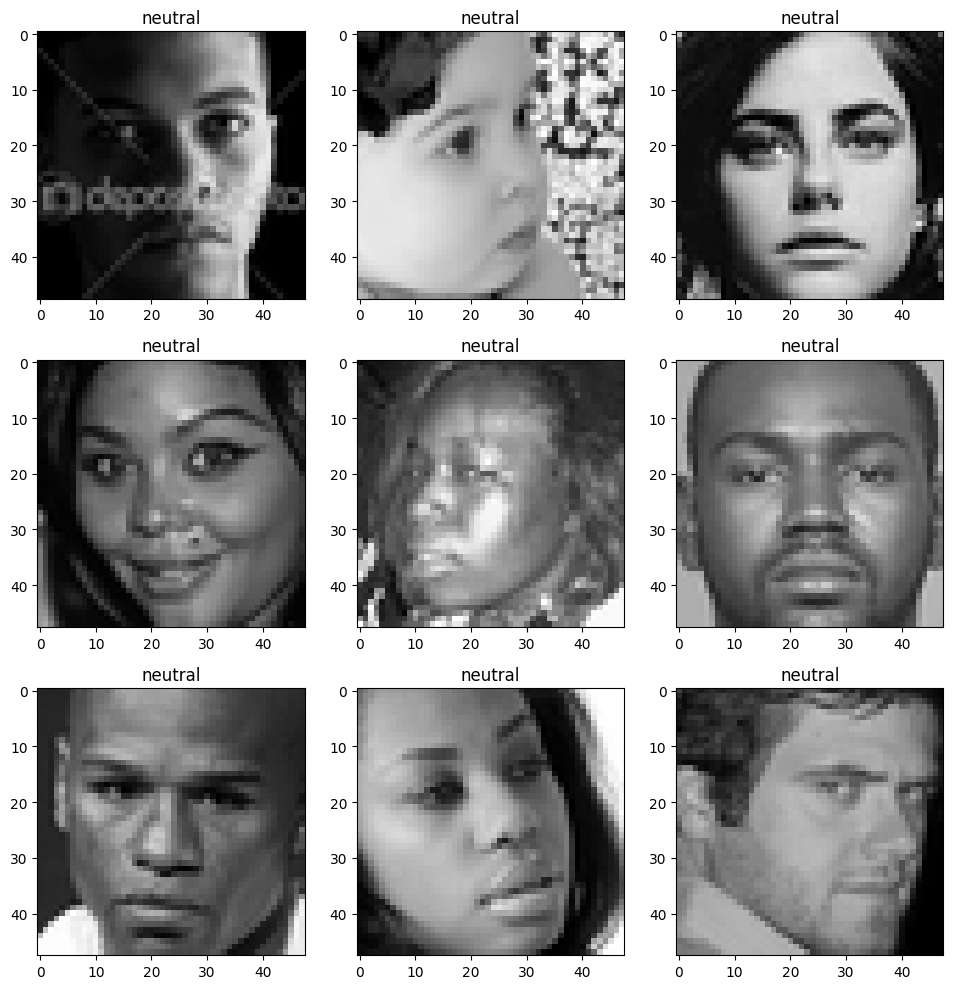

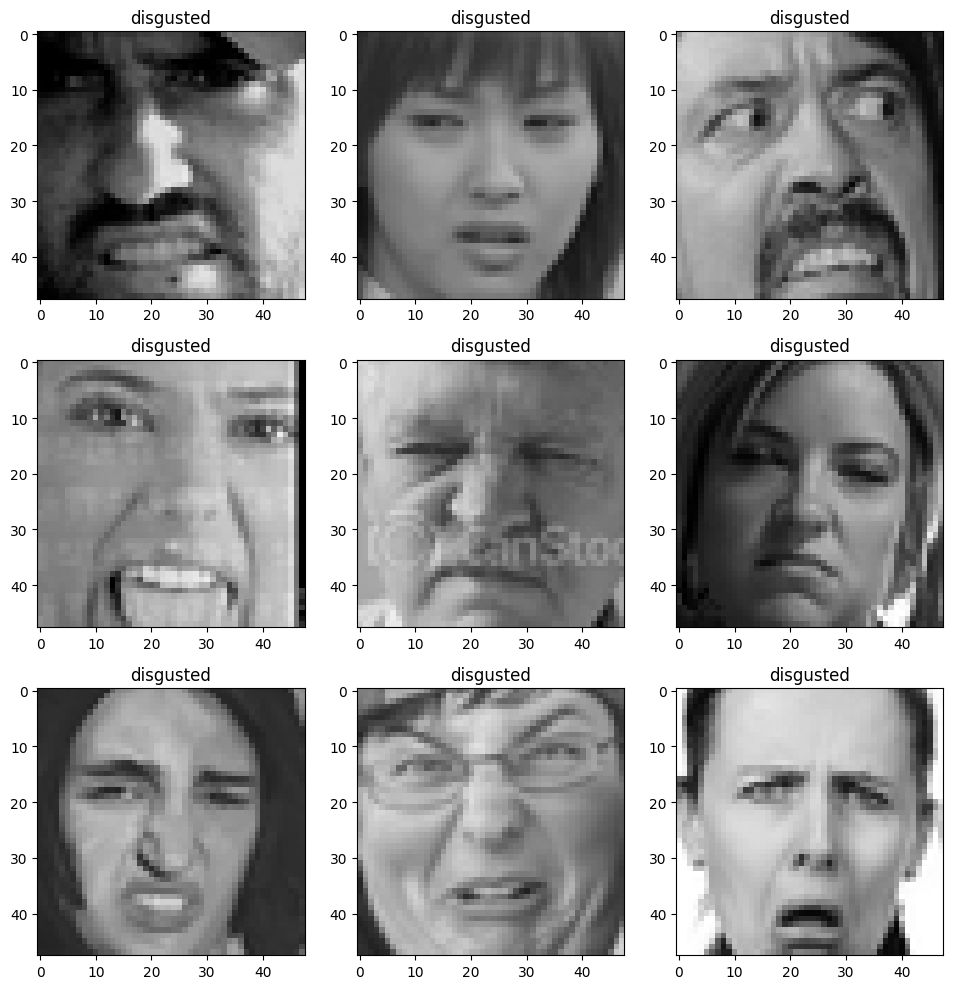

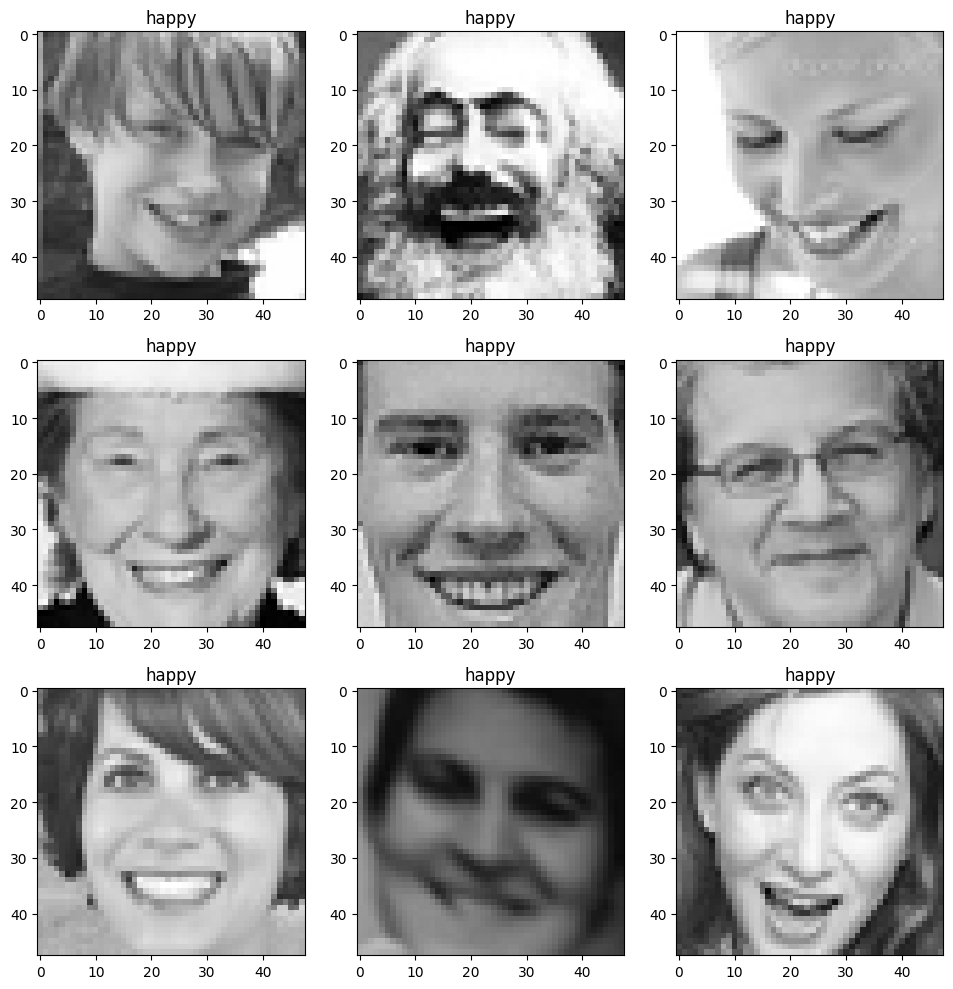

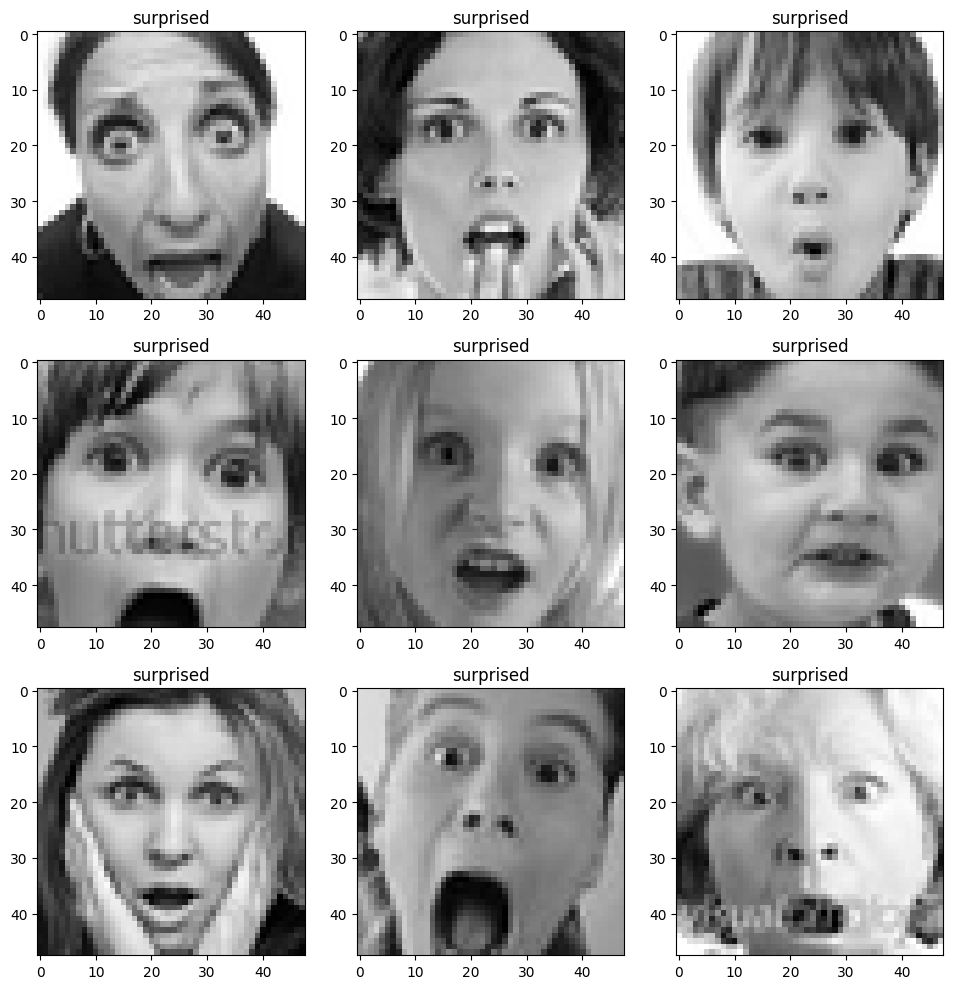

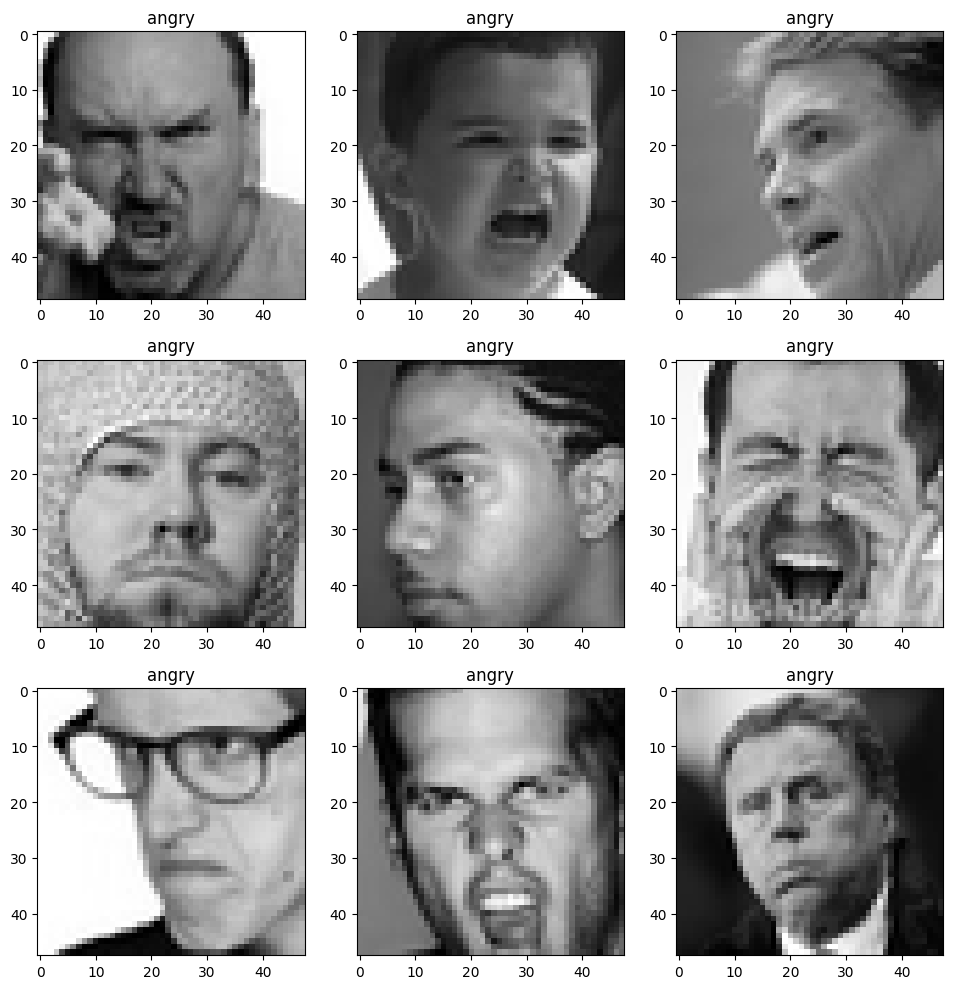

In [5]:
def display_images(emotion):
    plt.figure(figsize=(10,10))
    for i in range(1, 10, 1):
        plt.subplot(3,3,i) #Form a 3x3 grid for each label
        img = image.load_img(train_dir + '/' + emotion + "/" + os.listdir(train_dir + '/' + emotion)[i], target_size=(48, 48)) #load images
        plt.title(emotion) #display image label
        plt.imshow(img) #display image
        plt.tight_layout() #format images
    plt.show()

for i in os.listdir(train_dir):
    display_images(i)

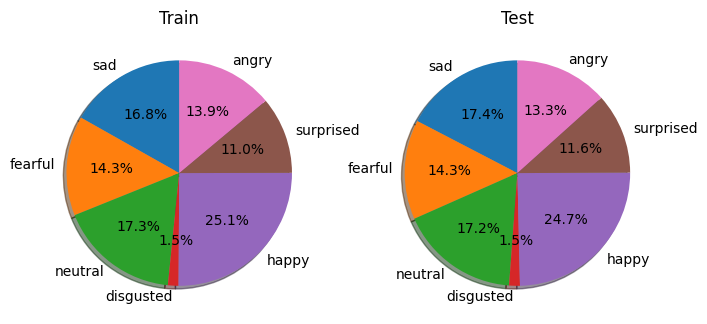

Emotion : sad
	Training : 4830
	 Testing : 1247
Emotion : fearful
	Training : 4097
	 Testing : 1024
Emotion : neutral
	Training : 4965
	 Testing : 1233
Emotion : disgusted
	Training : 436
	 Testing : 111
Emotion : happy
	Training : 7215
	 Testing : 1774
Emotion : surprised
	Training : 3171
	 Testing : 831
Emotion : angry
	Training : 3995
	 Testing : 958


In [6]:
x_train = np.array([ len(os.listdir(train_dir+i+'/')) for i in target_var ])
x_test = np.array([ len(os.listdir(test_dir+i+'/')) for i in target_var ])
label = target_var

fig, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].pie(x_train, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[1].pie(x_test, labels=label, autopct='%1.1f%%',shadow=True, startangle=90)
axes[0].set_title('Train')
axes[1].set_title('Test')
plt.show()

for i in target_var:
    print('Emotion : ' + i )
    print('\tTraining : ' + str(len(os.listdir(train_dir+i+'/'))) +'\n\t Testing : ' + str(len(os.listdir(test_dir+i+'/'))))

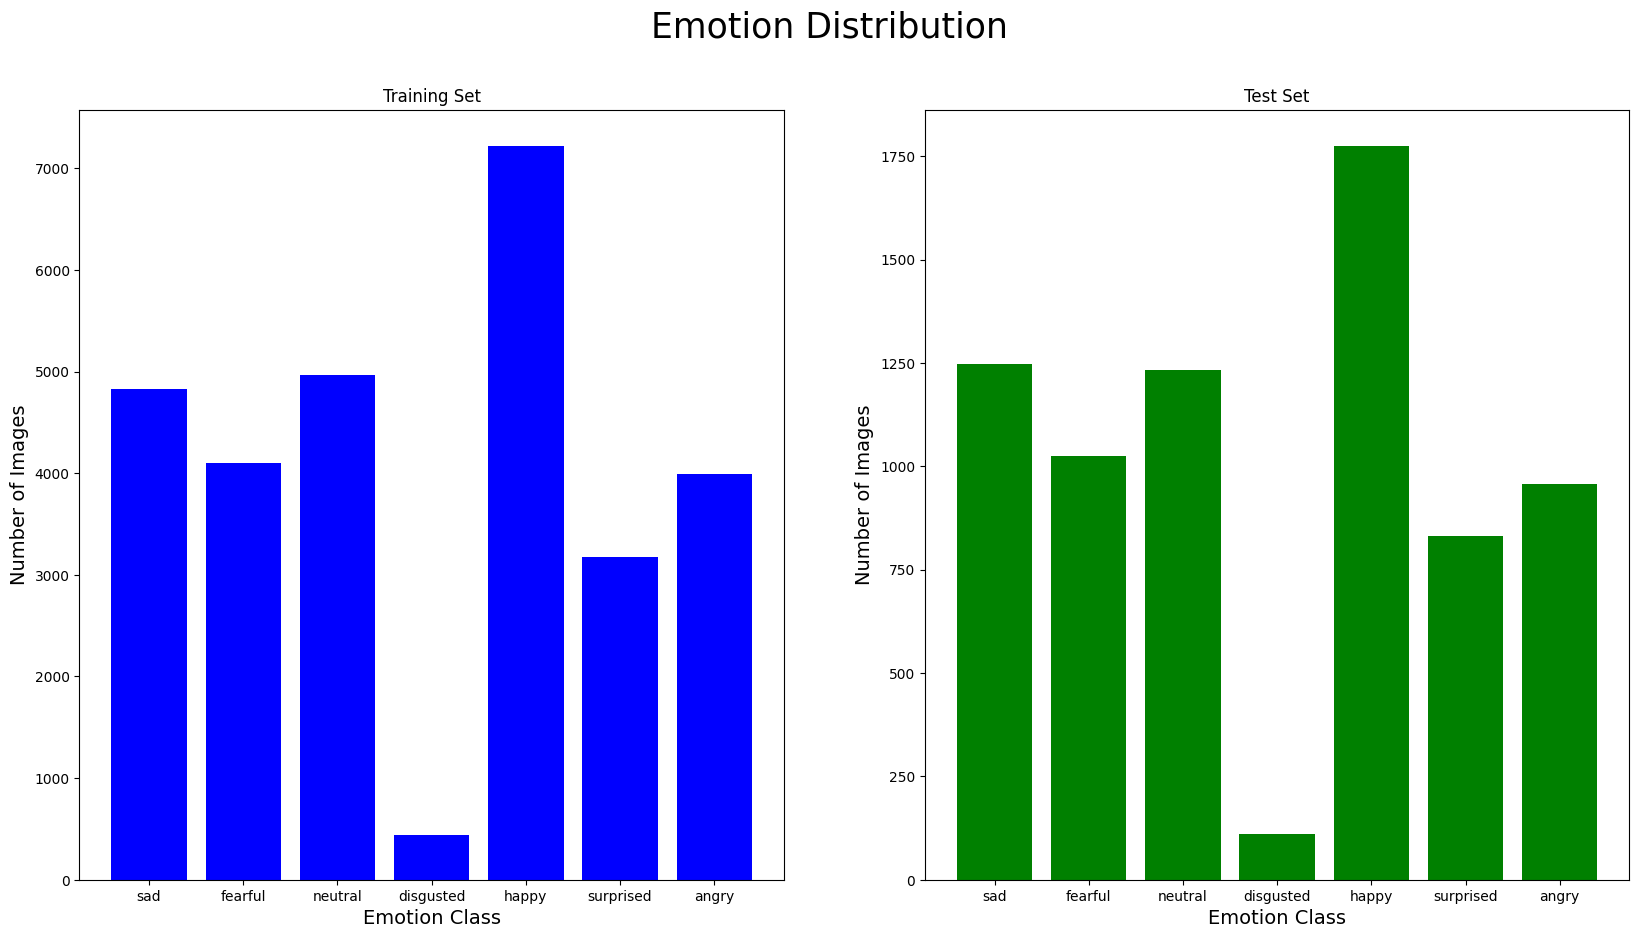

In [7]:

import matplotlib.pyplot as plt
#bar charts
train_dist = np.array([len(os.listdir(train_dir+i+'/')) for i in labels])
test_dist = np.array([len(os.listdir(test_dir+i+'/')) for i in labels])
x = labels

plt.figure(figsize=(20,10))
plt.suptitle('Emotion Distribution', fontsize=25)

ax1 = plt.subplot(1,2,1)
ax1.set_title('Training Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, train_dist, color='blue')

ax2 = plt.subplot(1, 2, 2)
ax2.set_title('Test Set')
plt.xlabel('Emotion Class', fontsize=14)
plt.ylabel('Number of Images', fontsize=14)
plt.bar(x, test_dist, color='green')

plt.savefig('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/distribucion', format='pdf')
plt.show()




In [8]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   zoom_range= 0.2,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   validation_split=0.2)

test_datagen = ImageDataGenerator(rescale=1.0/255)

#Read our images to the data augmentations
#Generates batches of augmented data
train = train_datagen.flow_from_directory(train_dir,
                                          subset='training',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

valid = train_datagen.flow_from_directory(train_dir,
                                          subset='validation',
                                          color_mode = 'grayscale',
                                          target_size = (48, 48),
                                          batch_size = 64,
                                          shuffle=True,
                                          class_mode = 'categorical')

test = test_datagen.flow_from_directory(test_dir,
                                        color_mode = 'grayscale',
                                        target_size = (48, 48),
                                        batch_size = 64,
                                        shuffle=False,
                                        class_mode = 'categorical')

Found 22968 images belonging to 7 classes.
Found 5741 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [9]:
train.class_indices
test.class_indices


{'angry': 0,
 'disgusted': 1,
 'fearful': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprised': 6}

In [10]:
from tensorflow.keras import Sequential, layers

model = Sequential([
    layers.Rescaling(1./255, input_shape=(48, 48, 1)),  # Cambiado de experimental a Rescaling
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Conv2D(128, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    #layers.Conv2D(256, 3, padding='same', activation='relu'),
    #layers.MaxPooling2D(),
    #layers.Dropout(0.5),
    #layers.Flatten(),
   #layers.Dense(512, activation='relu'),
   #layers.Dropout(0.5),
    layers.Dense(7, activation='softmax')
])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 6, 6, 7)             │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,575 (365.53 KB)

 Trainable params: 93,575 (365.53 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.models import Model

vgg = VGG19(weights='imagenet', include_top=False, classes=5)

#freeze
for layer in vgg.layers:
    layer.trainable = False

input = tf.keras.Input(shape=(48,48,1)) #what is input here

conv = Conv2D(3, kernel_size=(3,3), padding='same')(input)
vgg = vgg(conv)
x = Flatten()(vgg)
pred = Dense(7, activation='softmax')(x)

model = Model(inputs=input, outputs=pred)

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [13]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 48, 48, 3)           │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg19 (Functional)                   │ (None, 1, 1, 512)           │      20,024,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │           3,591 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,028,005 (76.40 MB)

 Trainable params: 3,621 (14.14 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [14]:
# to use callback use this code
from keras.callbacks import ModelCheckpoint
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight(class_weight='balanced',
                                                  classes=np.unique(train.classes),
                                                  y=train.classes)
class_weights = dict(zip(np.unique(train.classes),class_weights))

# Guardar el modelo en formato .keras
filepath = '/content/drive/MyDrive/IA_ProyectoAgosto/modelos/Model_3.epoch{epoch:02d}-loss{val_loss:.2f}.keras'

callbacks = [
    tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_delta=0.0001, verbose=1),
    tf.keras.callbacks.ModelCheckpoint(filepath=filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='min'),
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=3, verbose=1, restore_best_weights=True)
]


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
emotion = model.fit(train, validation_data=valid, epochs=15, callbacks=callbacks, class_weight=class_weights)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


358/359 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step - accuracy: 0.0791 - loss: 2.0370
Epoch 1: val_loss improved from inf to 1.93887, saving model to /content/drive/MyDrive/IA_ProyectoAgosto/modelos/Model_3.epoch01-loss1.94.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 7511s 21s/step - accuracy: 0.0793 - loss: 2.0367 - val_accuracy: 0.1855 - val_loss: 1.9389 - learning_rate: 1.0000e-04
Epoch 2/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step - accuracy: 0.1834 - loss: 1.9336
Epoch 2: val_loss improved from 1.93887 to 1.93082, saving model to /content/drive/MyDrive/IA_ProyectoAgosto/modelos/Model_3.epoch02-loss1.93.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 91s 250ms/step - accuracy: 0.1834 - loss: 1.9336 - val_accuracy: 0.1946 - val_loss: 1.9308 - learning_rate: 1.0000e-04
Epoch 3/15
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step - accuracy: 0.2057 - loss: 1.8932
Epoch 3: val_loss did not improve from 1.93082
359/359 ━━━━━━━━━━━━━━━━━━━━ 85s 233ms/step - accuracy: 0.2057 - loss: 1.8933 - val_accuracy: 0.1820 - val_loss: 

In [18]:
#Saving our model/weights
model.save('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/emotion-detection.keras')  # Use the new Keras format
model.save_weights('emotion_weight.weights.h5')  # Follow the required naming convention
model.save('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/emotion-detection.keras')
np.save("history.npy", emotion.history)
print('saved model to disk.')


saved model to disk.


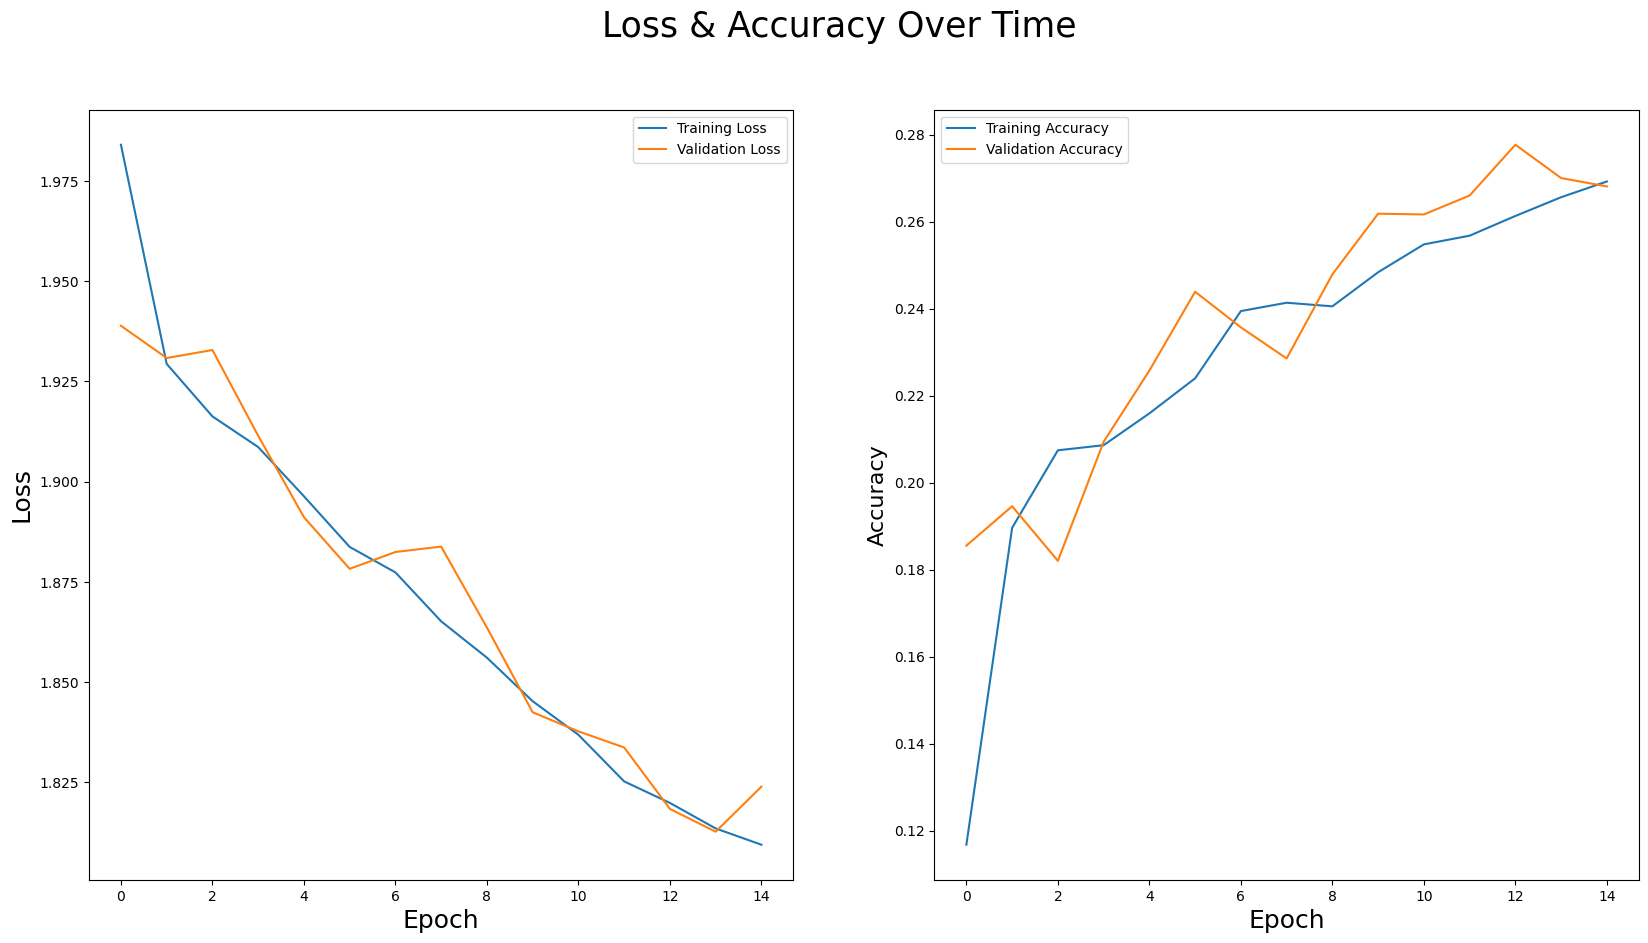

In [19]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion.history['loss'], label='Training Loss')
plt.plot(emotion.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion.history['accuracy'], label='Training Accuracy')
plt.plot(emotion.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
# Guarda la figura en PDF
plt.savefig('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/result3', format='pdf')

# Opcionalmente, muestra la gráfica

plt.show()

In [20]:
train_loss, train_acc = model.evaluate(train)
test_loss, test_acc = model.evaluate(test)

359/359 ━━━━━━━━━━━━━━━━━━━━ 71s 197ms/step - accuracy: 0.2789 - loss: 1.8105
  1/113 ━━━━━━━━━━━━━━━━━━━━ 21s 190ms/step - accuracy: 0.1719 - loss: 1.8918

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


113/113 ━━━━━━━━━━━━━━━━━━━━ 1893s 17s/step - accuracy: 0.2550 - loss: 1.8066


In [25]:
from keras.models import load_model

# Use the exact filename of your saved model, which is 'emotion-detection.keras'
mod = load_model('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/emotion-detection.keras')


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


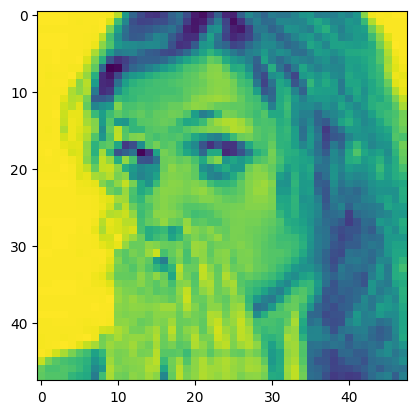

In [27]:
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones/test/fearful/im26.png',
                     target_size = (48,48),color_mode = "grayscale")
img = np.array(img)
plt.imshow(img)

In [28]:
labels = sorted(labels)
img = np.expand_dims(img,axis = 0) #reshapes to 1,48,48
img = img.reshape(1,48,48,1)
result = model.predict(img) #using model to predict emotion of image
result = list(result[0])

#print result - we see that the image slightly detected the fearful emotion as well as surprised
print(result)
print(train.class_indices)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
[9.2987e-41, 0.0, 1.0, 0.0, 0.0, 9.80239e-40, 1.7112199e-34]
{'angry': 0, 'disgusted': 1, 'fearful': 2, 'happy': 3, 'neutral': 4, 'sad': 5, 'surprised': 6}


In [29]:
img_index = result.index(max(result))
print('Prediction:',labels[img_index])
#wrong prediction

Prediction: fearful


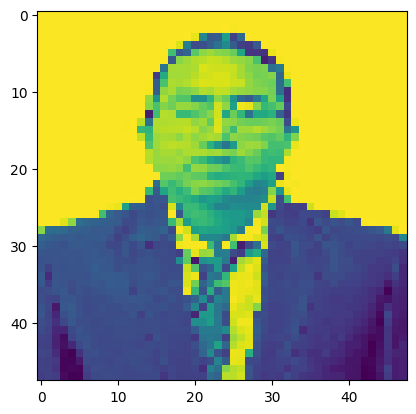

In [32]:
#checfking the example pic of surperised with the current model
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/10.jpeg',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: fearful


<BarContainer object of 7 artists>

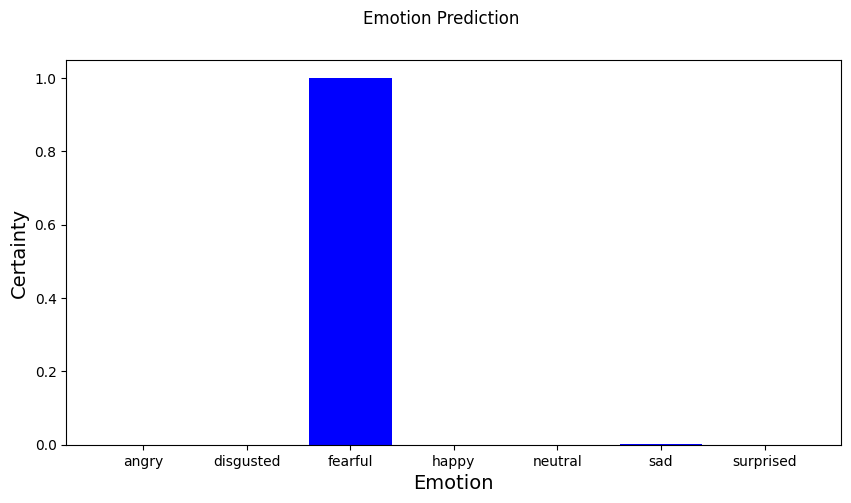

In [33]:
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')


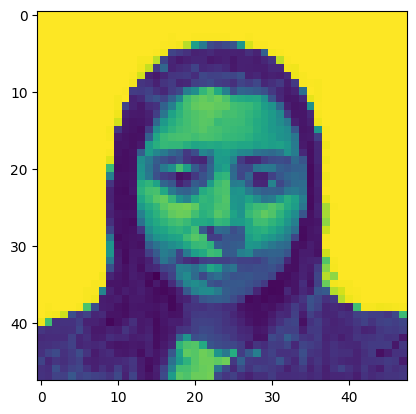

In [34]:
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/46.png',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: fearful


<BarContainer object of 7 artists>

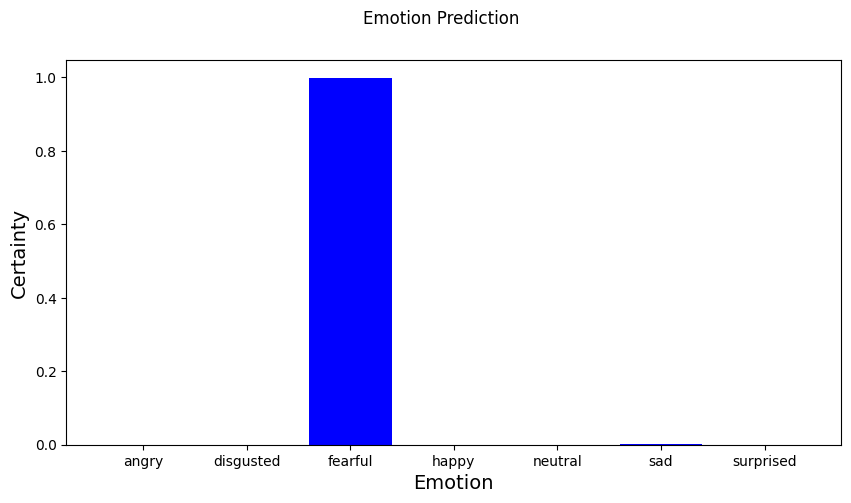

In [35]:
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')

In [37]:
emotion = model.fit(train, validation_data=valid, epochs=50, callbacks=callbacks, class_weight=class_weights)

Epoch 1/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.2723 - loss: 1.8355
Epoch 1: val_loss improved from 1.81271 to 1.80618, saving model to /content/drive/MyDrive/IA_ProyectoAgosto/modelos/Model_3.epoch01-loss1.81.keras
359/359 ━━━━━━━━━━━━━━━━━━━━ 90s 248ms/step - accuracy: 0.2723 - loss: 1.8354 - val_accuracy: 0.2790 - val_loss: 1.8062 - learning_rate: 1.0000e-04
Epoch 2/50
358/359 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step - accuracy: 0.2829 - loss: 1.7756
Epoch 2: val_loss did not improve from 1.80618
359/359 ━━━━━━━━━━━━━━━━━━━━ 91s 250ms/step - accuracy: 0.2829 - loss: 1.7757 - val_accuracy: 0.2618 - val_loss: 1.8252 - learning_rate: 1.0000e-04
Epoch 3/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.2597 - loss: 1.8202
Epoch 3: val_loss did not improve from 1.80618
359/359 ━━━━━━━━━━━━━━━━━━━━ 90s 246ms/step - accuracy: 0.2597 - loss: 1.8201 - val_accuracy: 0.2761 - val_loss: 1.8112 - learning_rate: 1.0000e-04
Epoch 4/50
359/359 ━━━━━━━━━━━━━━━━━━━━ 0s 192ms/s

In [39]:
#Saving our model/weights
model.save('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/emotion-detection03_50.h5')
model.save_weights('emotion_weight.weights.h5') # Added .weights to the filename
np.save("history", emotion.history)
print('saved model to disk.')

saved model to disk.


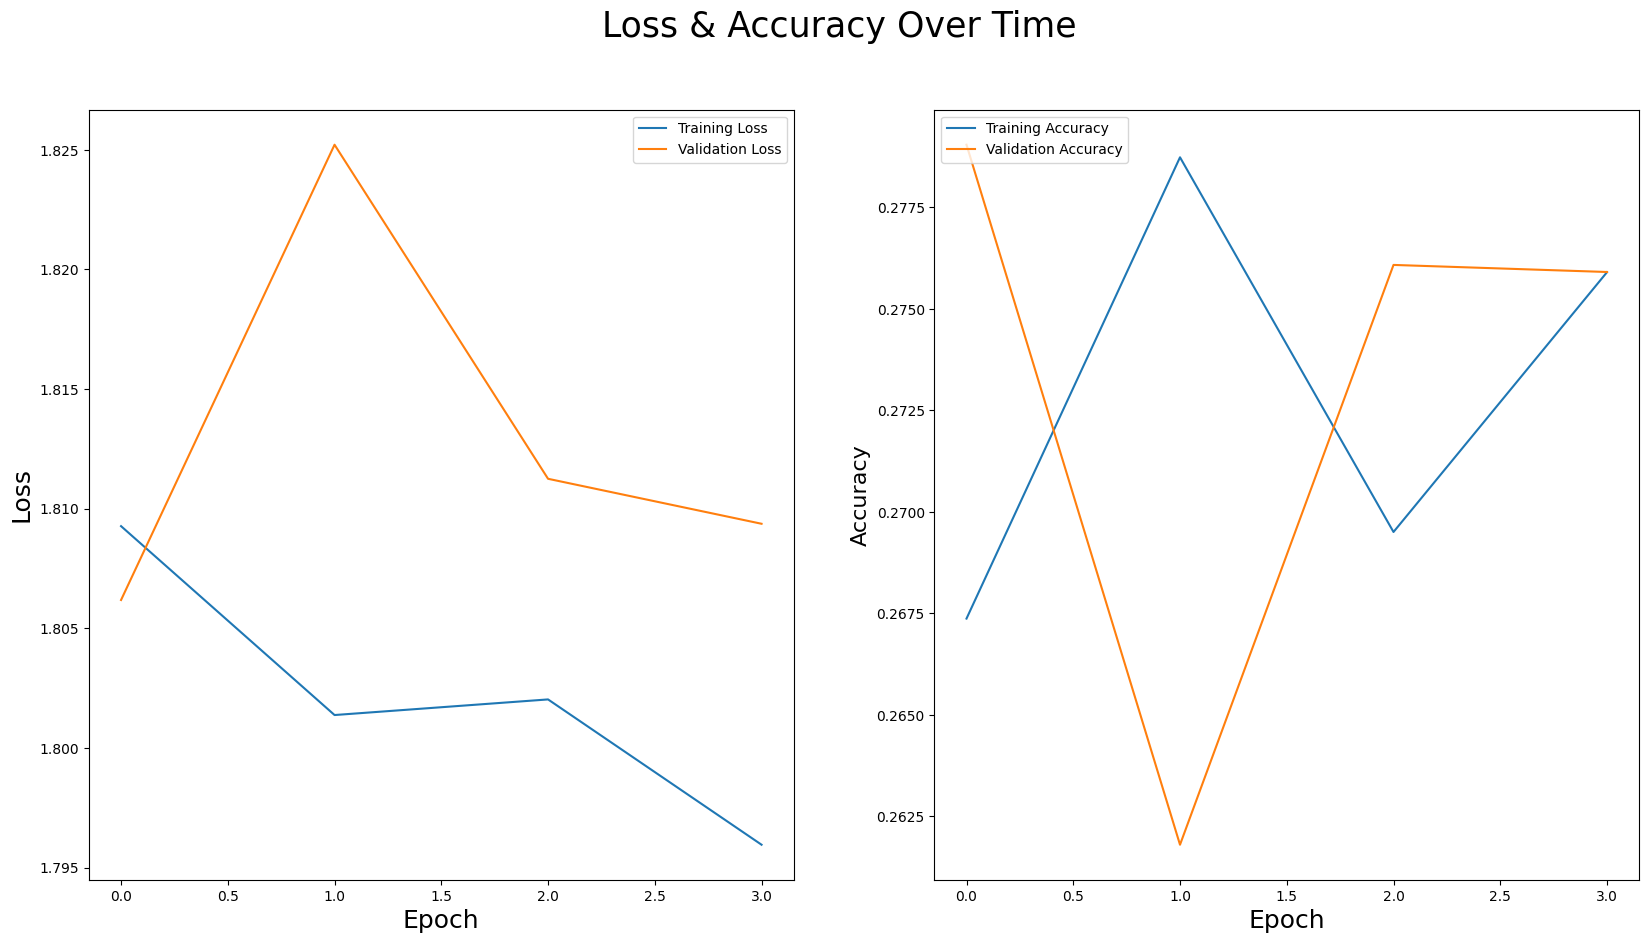

In [40]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.suptitle('Loss & Accuracy Over Time', fontsize=25)

plt.subplot(1, 2, 1)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.plot(emotion.history['loss'], label='Training Loss')
plt.plot(emotion.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(emotion.history['accuracy'], label='Training Accuracy')
plt.plot(emotion.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='upper left')
# Guarda la figura en PDF
plt.savefig('/content/drive/MyDrive/IA_ProyectoAgosto/modelos/result3_50', format='pdf')

# Opcionalmente, muestra la gráfica

plt.show()

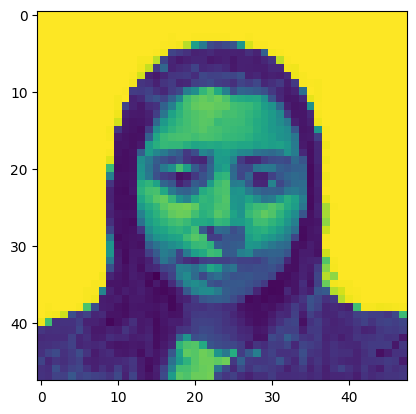

In [41]:
img = image.load_img('/content/drive/MyDrive/IA_ProyectoAgosto/emociones2/46.png',
                     target_size=(48,48),color_mode='grayscale')
img = np.array(img)
plt.imshow(img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Prediction: fearful


<BarContainer object of 7 artists>

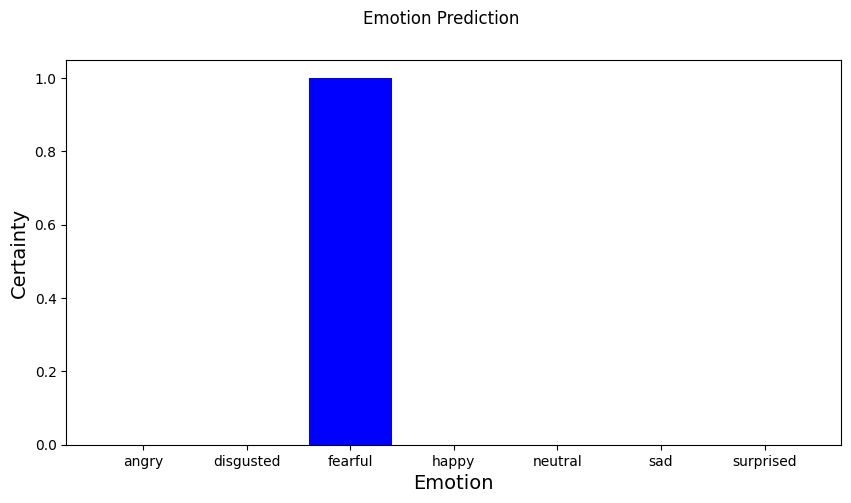

In [42]:
img = np.expand_dims(img,axis = 0)
img = img.reshape(1,48,48,1)
result = model.predict(img)
result = list(result[0])

img_index = result.index(max(result))
print('Prediction:',labels[img_index])

plt.figure(figsize=(10,5))
plt.suptitle('Emotion Prediction')

ax1 = plt.subplot()
plt.xlabel('Emotion', fontsize=14)
plt.ylabel('Certainty', fontsize=14)


plt.bar(labels, np.array(result), color='blue')